<a href="https://colab.research.google.com/github/Nkarkare1/allosaurusToMidi/blob/main/allosaurusToMidi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This block should only be run after initializing/reinitializing notebook.

In [ ]:
!pip install pretty_midi mir_eval pyfluidsynth allosaurus

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.5 MB/s eta 0:00:00
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10745 sha256=1114da98ba6b0eb1cfbd0ff78b403a0fa5fde4998a2d179cd12f1f853913fc7d
  Stored in directory: /root/.cache/pip/wheels/9c/ea/66/8e45247b09052a933eb1a680b7c64802298faba58aac9b346b
Successfully built unicodecsv


In [ ]:
import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# For putting audio in the notebook
import IPython.display
from allosaurus.app import read_recognizer
import io
import sys

In [ ]:
audioName = "AnAngelInDisguiseSinging.wav"
allosaurusOut = "allosaurusOut.txt"

# load your model by the <model name>, will use 'latest' if left empty
model = read_recognizer()

model = read_recognizer()

# redirect stdout to a StringIO object
old_stdout = sys.stdout
sys.stdout = temp_out = io.StringIO()

# run inference on <audio_file> with <lang>, lang will be 'ipa' if left empty
model.recognize(f'./AudioInputs/{audioName}', timestamp=True)

# restore stdout
sys.stdout = old_stdout

# get the output from the StringIO object
output = temp_out.getvalue()

print(output)
# write the output to a file
with open(allosaurusOut, 'w') as f:
  f.write(output)

/usr/local/lib/python3.10/dist-packages/allosaurus/am/utils.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load(str(path), map_location=torch.

In [ ]:
phoneme_to_mouth = {
    'x': 100,
    'ʌ': 20,
    'n': 10,
    'a': 40,
    'ɪ': 10,
    'tɕ': 10,
    'y': 15,
    'uə': 30,
    'tʂ': 10,
    'e': 25,
    's': 5,
    'k͡p̚': 5,
    'ð': 20,
    'j': 20,
    'iː': 10,
    'b̞': 20,
    'ɾ': 10,
    'ə': 15,
    'm': 15,
    'ɛ': 30,
    's̪': 10,
}

In [ ]:
angelInDisguiseOut = """0.000 0.045 x
0.090 0.045 ʌ
0.270 0.045 n
0.330 0.045 a
0.390 0.045 ɪ
0.480 0.045 tɕ
0.570 0.045 y
0.750 0.045 uə
0.960 0.045 tʂ
1.020 0.045 e
1.200 0.045 s
1.290 0.045 k͡p̚
1.410 0.045 a
1.710 0.045 ð
1.770 0.045 ɪ
1.860 0.045 s̪
1.920 0.045 uə
1.980 0.045 a
2.130 0.045 j
2.190 0.045 iː
2.370 0.045 b̞
2.460 0.045 a
2.730 0.045 ɾ
2.790 0.045 ə
2.970 0.045 m
3.030 0.045 ɛ
"""

In [ ]:
# Split the input string into lines
lines = angelInDisguiseOut.strip().split('\n')

# Create a list to store the timestamps and intensities
timestamps = []
last_timestamp = float(lines[-1].strip().split()[0])
# Iterate over the lines and extract the timestamps and intensities
for i in range(len(lines)):
  parts = lines[i].strip().split()
  start_time = float(parts[0])
  phoneme = parts[2]
  intensity = phoneme_to_mouth[phoneme]
  end_time = float(lines[i+1].strip().split()[0]) if i < len(lines) - 1 else last_timestamp

  timestamps.append((start_time, end_time, intensity))


close_mouth = (last_timestamp, last_timestamp + 1, 0)
timestamps.append(close_mouth)
print(timestamps)

[(0.0, 0.09, 100), (0.09, 0.27, 20), (0.27, 0.33, 10), (0.33, 0.39, 40), (0.39, 0.48, 10), (0.48, 0.57, 10), (0.57, 0.75, 15), (0.75, 0.96, 30), (0.96, 1.02, 10), (1.02, 1.2, 25), (1.2, 1.29, 5), (1.29, 1.41, 5), (1.41, 1.71, 40), (1.71, 1.77, 20), (1.77, 1.86, 10), (1.86, 1.92, 10), (1.92, 1.98, 30), (1.98, 2.13, 40), (2.13, 2.19, 20), (2.19, 2.37, 10), (2.37, 2.46, 20), (2.46, 2.73, 40), (2.73, 2.79, 10), (2.79, 2.97, 15), (2.97, 3.03, 15), (3.03, 3.03, 30), (3.03, 4.029999999999999, 0)]


In [ ]:
pm = pretty_midi.PrettyMIDI(initial_tempo=80)
mouth = pretty_midi.Instrument(program=0, is_drum=False, name='Piano')
pm.instruments.append(mouth)

In [ ]:
for start_time, end_time, intensity in timestamps:
  mouth.notes.append(pretty_midi.Note(velocity=intensity, pitch=60, start=start_time, end=end_time))

print(mouth.notes)

[Note(start=0.000000, end=0.090000, pitch=60, velocity=100), Note(start=0.090000, end=0.270000, pitch=60, velocity=20), Note(start=0.270000, end=0.330000, pitch=60, velocity=10), Note(start=0.330000, end=0.390000, pitch=60, velocity=40), Note(start=0.390000, end=0.480000, pitch=60, velocity=10), Note(start=0.480000, end=0.570000, pitch=60, velocity=10), Note(start=0.570000, end=0.750000, pitch=60, velocity=15), Note(start=0.750000, end=0.960000, pitch=60, velocity=30), Note(start=0.960000, end=1.020000, pitch=60, velocity=10), Note(start=1.020000, end=1.200000, pitch=60, velocity=25), Note(start=1.200000, end=1.290000, pitch=60, velocity=5), Note(start=1.290000, end=1.410000, pitch=60, velocity=5), Note(start=1.410000, end=1.710000, pitch=60, velocity=40), Note(start=1.710000, end=1.770000, pitch=60, velocity=20), Note(start=1.770000, end=1.860000, pitch=60, velocity=10), Note(start=1.860000, end=1.920000, pitch=60, velocity=10), Note(start=1.920000, end=1.980000, pitch=60, velocity=30

<ipython-input-33-61469c7ea88a>:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],


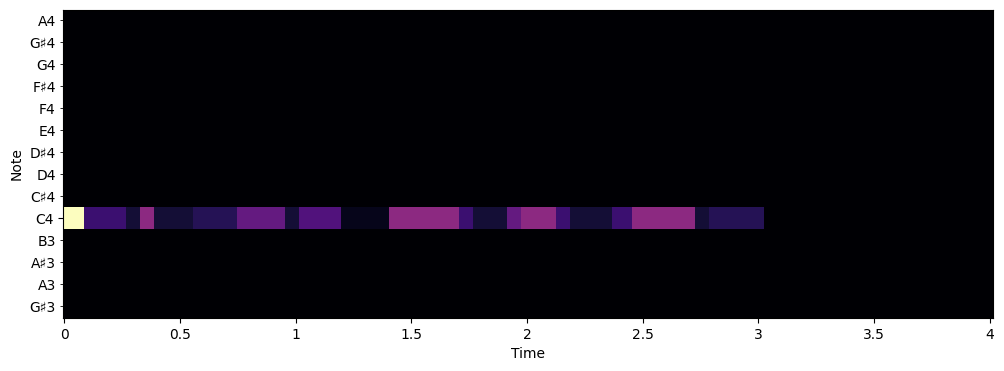

In [ ]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(12,4))
plot_piano_roll(pm, 56, 70)


In [ ]:
pm.write('out.mid')